In [1]:

import pandas as pd

In [2]:
#importing other libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [3]:
# reading the csv data Facebook_data. Loading data from text file having tab
FB_data = pd.read_csv("C:/Users/vjaya/Documents/pseudo_facebook.tsv",sep = '\t')
FB_data.head()

# summarise facebook data
#FB_data.describe(include = 'all', percentiles =[]).T.replace(np.nan,' ', regex= True)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
# Checking the dataframe for data types and missing value
FB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [5]:
# from the above it is clear that there are 175 missing values for "gender" and 2 missing values for "tenure"
FB_data.describe()
# the table below provides information about numeric data types only, hence "gender" which is object datatype is excluded

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


(0, 5000)

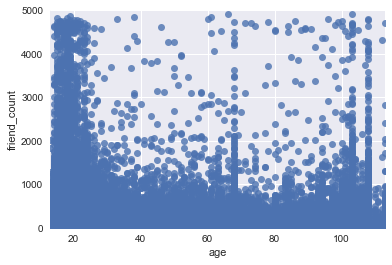

In [6]:
# review the correlation between  two variables, "Friend_count" and "age"
sns.set(style='darkgrid')
%matplotlib inline

ax = sns.regplot(x = 'age', y = 'friend_count', data = FB_data, fit_reg = False)
plt.xlim(13,113)
plt.ylim(0,5000)

In [7]:
# interesting finding on age to friends count, there are 70 years aged and 100 years aged users having lot of friends count
# let us review the age information
FB_data.age.describe()

count    99003.000000
mean        37.280224
std         22.589748
min         13.000000
25%         20.000000
50%         28.000000
75%         50.000000
max        113.000000
Name: age, dtype: float64

In [8]:
FB_data.friend_count.describe()

count    99003.000000
mean       196.350787
std        387.304229
min          0.000000
25%         31.000000
50%         82.000000
75%        206.000000
max       4923.000000
Name: friend_count, dtype: float64

In [9]:
FB_data.tenure.describe()

count    99001.000000
mean       537.887375
std        457.649874
min          0.000000
25%        226.000000
50%        412.000000
75%        675.000000
max       3139.000000
Name: tenure, dtype: float64

In [10]:
# adding few more libraries for EDA
import pandas_profiling
import collections
%matplotlib inline
import pandas as pd

C:\Users\vjaya\Anaconda4\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\vjaya\Anaconda4\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\vjaya\Anaconda4\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\vjaya\Anaconda4\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\vjaya\Anaconda4\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\vjaya\Anaconda4\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\vja

In [11]:
# print multiple statements in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
import statistics

In [13]:
FB_data['gender'].mode()

0    male
dtype: object

In [14]:
FB_data['tenure'].mode()

0    300.0
dtype: float64

# Data wrangling - querying variable with missing values and updating them to support further analysis

In [15]:
FB_data[FB_data['gender'].isnull()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3224,1781137,25,3,1988,1,NaN,203.0,1,1,1,0,1,0,0,0
4123,1110111,31,12,1982,1,NaN,227.0,2,2,0,0,0,0,0,0
5920,2000185,25,15,1988,2,NaN,239.0,4,4,0,0,0,0,0,0
6432,1137054,59,18,1954,2,NaN,2076.0,4,0,23,5,23,4,0,1
6870,1783336,62,5,1951,9,NaN,2047.0,5,0,0,1,0,1,0,0
6886,1280036,67,2,1946,7,NaN,2056.0,5,2,0,0,0,0,0,0
7130,2185523,108,6,1905,6,NaN,1517.0,5,2,6,15,0,4,6,11
7242,1117499,90,2,1923,11,NaN,1960.0,5,4,33,12,2,0,31,12
7555,1098347,27,19,1986,4,NaN,1150.0,7,2,0,0,0,0,0,0
10093,1020617,85,7,1928,8,NaN,2222.0,9,1,1,1,0,0,1,1


In [16]:
# Replace missing values for gender with mode
FB_data['gender'].fillna(FB_data['gender'].mode()[0], inplace = True)

In [17]:
# Replace missing values for tenure with mode
FB_data['tenure'].fillna(FB_data['tenure'].mode()[0], inplace = True)

In [18]:
# Validating variables for any missing entries
FB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null object
tenure                   99003 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


<Figure size 2160x720 with 0 Axes>

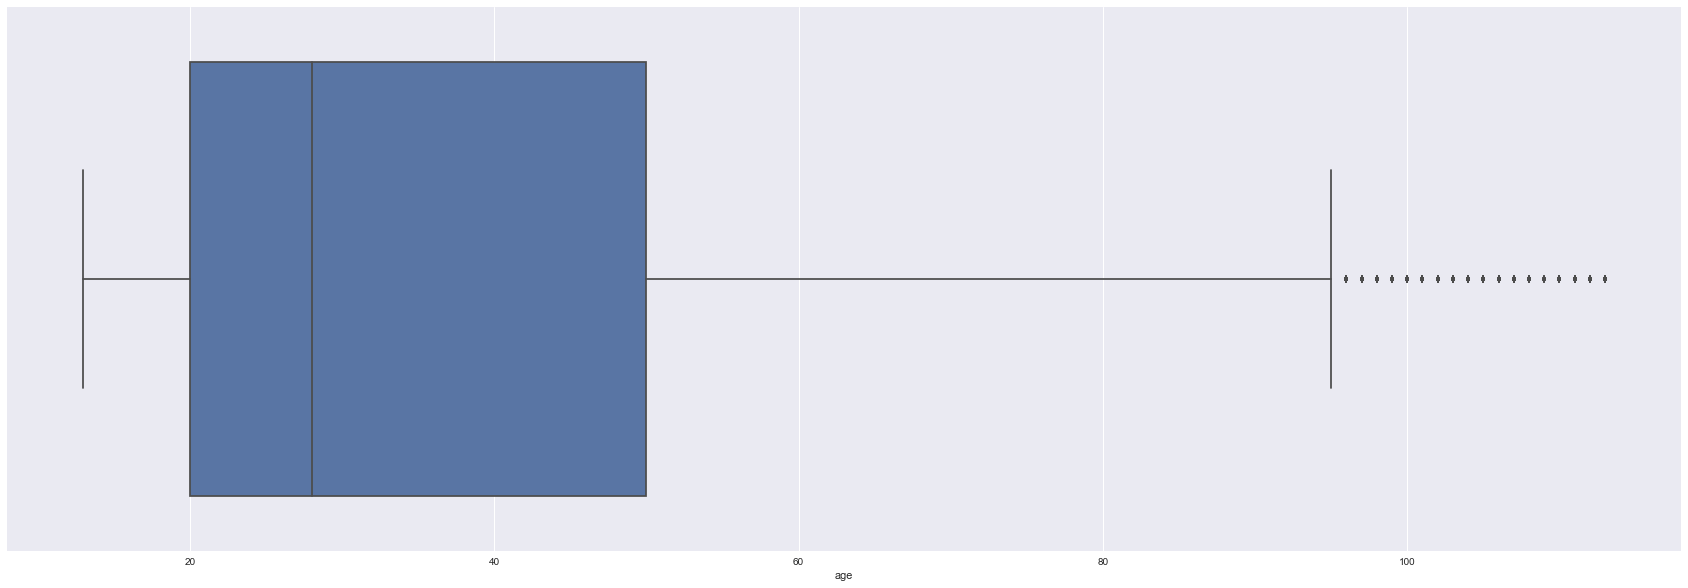

In [19]:
# boxplot to check for outliers in age
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,10))
sns.boxplot(x ='age', data = FB_data)

In [20]:
# In the above box plot it is evident that "above age 95 years" is the outlier
# we will remove outliers in äge"using the IQR method:
    
import numpy as np
outlier_indices = []
Q1 = np.percentile(FB_data['age'], 25)
Q3 = np.percentile(FB_data['age'],75)
IQR = Q3 - Q1
        
 # outlier step
outlier_step = 1.5 * IQR
        
# Determine a list of indices of outliers for feature col
outlier_list_col = FB_data[(FB_data['age'] < Q1 - outlier_step) | (FB_data['age'] > Q3 + outlier_step )].index
        
# append the found outlier indices for col to the list of outlier indices 
outlier_indices.extend(outlier_list_col)
outlier_indices = collections.Counter(outlier_indices)        
    
IQR, Q3, Q1, outlier_step

(30.0, 50.0, 20.0, 45.0)

In [21]:
# detect outliers to drop
FB_data = FB_data.drop(outlier_indices, axis = 0).reset_index(drop = True)
FB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94689 entries, 0 to 94688
Data columns (total 15 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94689 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 10.8+ MB


# Grouping data by Age , Tenure to present further analyisi

In [22]:
def age_group(m):
  if m['age'] >= 13 and m['age'] <= 20 :
     return '13-20 years'
  elif m['age'] >= 21 and m['age'] <= 35 :
     return '21-35 years'
  elif m['age'] >= 36 and m['age'] <= 50 :
     return '36- 50 years'
  elif m['age'] >= 51 and m['age'] <= 64:
     return '51-64 years'
  elif m['age']  >= 65:
     return '65+ years'
  
FB_data['age_group'] = FB_data.apply(lambda m: age_group(m),axis=1)

In [23]:
def tenure_group(m):
  if m['tenure'] <365 :
     return 'Less than 1 year'
  elif m['tenure'] >= 365 and m['tenure'] < 730 :
     return '1 year'
  elif m['tenure'] >= 730 and m['tenure'] < 1095 :
     return '2 years'
  elif m['tenure'] >= 1095 and m['tenure'] < 1460 :
     return '3 years'
  elif m['tenure'] >= 1460 and m['tenure'] < 1825 :
     return '4 years'
  elif m['tenure'] >= 1825 and m['tenure'] < 2190 :
     return '5 years'
  elif m['tenure'] >= 2190:
     return '6+ years'

FB_data['tenure_group'] = FB_data.apply(lambda m: tenure_group(m),axis=1)

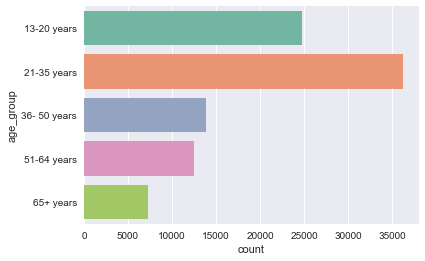

In [24]:
# let us plot the age group information as count plot
ax = sns.countplot(y="age_group",data=FB_data, palette="Set2")

The above count plot highlights that there are more Facebook users in the age group of "21 to 35 years". Next big age group is the "13 to 20 years". Age group "65+"has the lowest number of Facebook users

In the next count plot, I would like to overlay the age group information with gender

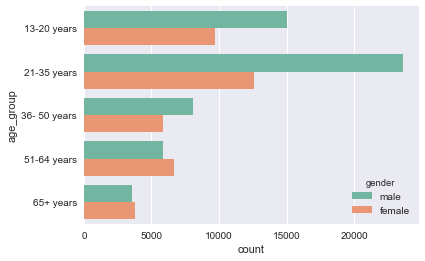

In [25]:
ax = sns.countplot(y="age_group",data=FB_data, palette="Set2", hue="gender")

Interesting observations are emerging:
1. In 3 age grpups the male Facebook users are more than female -
- 13 to 20 years
- 21 to 35 years
- 36 to 50 years
2. In 1 age group, 51 to 64 years the female Facebook users are more, while the last age group "65 +"has somewhat equal number of users

# Date of birth analysis

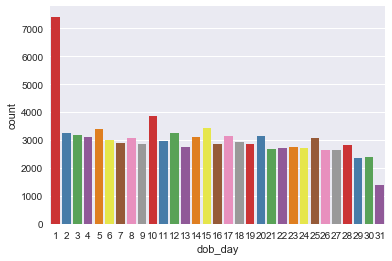

In [26]:
#let us first plot the frequency distribution of dob_day
ax = sns.countplot(x="dob_day", data=FB_data, palette="Set1")

All facebook users have registered for the service using 1st day of the month, this could be due to privacy concerns 

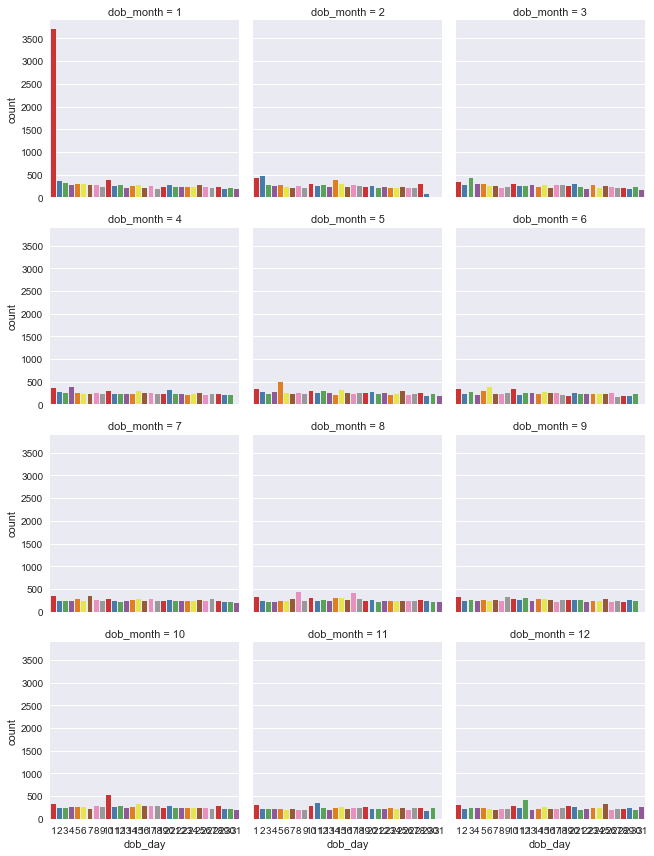

In [27]:
#let us now plot the frequency distribution of dob_day by dob_month wise to understand the data 
ax = sns.factorplot(x="dob_day", col="dob_month", data=FB_data, col_wrap=3, kind="count", palette="Set1", size=3, aspect=1)

Clearly most users have registered their date of birth as 1st Jan,evident from the Jan month graph. Definitely, user have tried to withhold the true DOB information due to privacy

# Friends count analysis

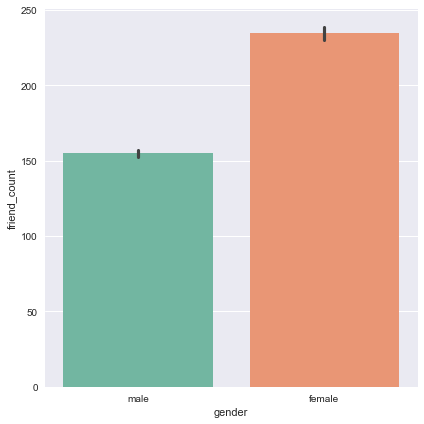

In [28]:
# let us explore the data to understand the friends count by gender. For this we will use factor plot for analysing friends
sns.factorplot(x="gender", y="friend_count", data=FB_data, kind="bar", aspect=1,palette="Set2",size=6)

In [29]:
# we cab also look at the friends count numerically, by gender 
FB_data.groupby('gender').friend_count.sum()

gender
female    9039771
male      8686560
Name: friend_count, dtype: int64

In [30]:
# we can also look at other datapoints such as mean, 25% etc
FB_data.groupby('gender').friend_count.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,38558.0,234.446055,465.704715,0.0,36.0,93.0,235.0,4863.0
male,56131.0,154.755126,290.337201,0.0,26.0,70.0,171.0,4917.0


Female facebook users have more friends, evident from Line number 30, for count and 31 for other indicators such as mean

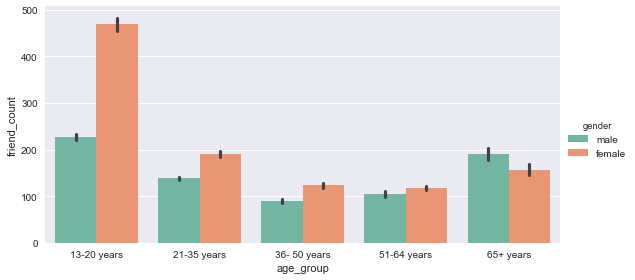

In [31]:
sns.factorplot(x="age_group", y="friend_count", data=FB_data, kind="bar", hue='gender', aspect=2,palette="Set2")

Female facebook users in All age group categories, with the exception of "65+ years" have higher friend count than male FB users 

# Tenure Analysis

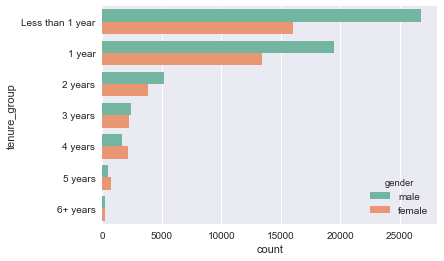

In [32]:
ax = sns.countplot(y="tenure_group",data=FB_data, palette="Set2", hue="gender")

The above countplot shows that there is increase in number of users each year, more male users are adding Facebook in the 1 year and less than 1 year tenure groups

# Other variable analysis , such as "Likes analysis"

In [33]:
FB_data[['likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']].describe()

,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000
mean,156.273031,143.121778,106.572833,84.177814,49.700134,58.943922
std,577.365956,1414.113509,448.769500,852.926814,288.504027,614.112766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,79.000000,57.000000,45.000000,32.000000,6.000000,19.000000
max,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


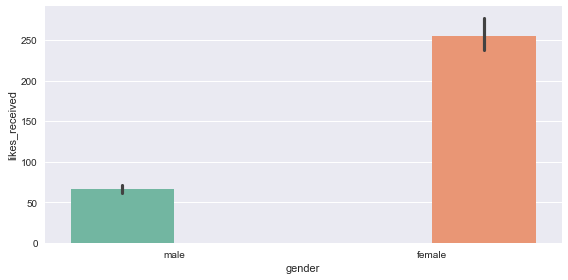

In [36]:
sns.factorplot(x="gender", y="likes_received", data=FB_data, kind="bar", hue='gender', aspect=2,palette="Set2")

Female FB users are receiving more likes for their post, this trend corresponds to another trend that we saw eaelier where the Female FB users had more friends than male FB users

We can explore if this trend is seen in mobile likes received

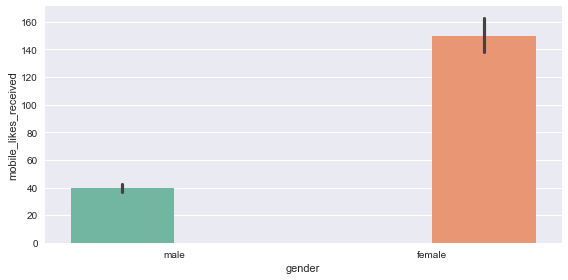

In [35]:
sns.factorplot(x="gender", y="mobile_likes_received", data=FB_data, kind="bar", hue='gender', aspect=2,palette="Set2")

# Some more plots to present the likes data in a single view using Pairplot

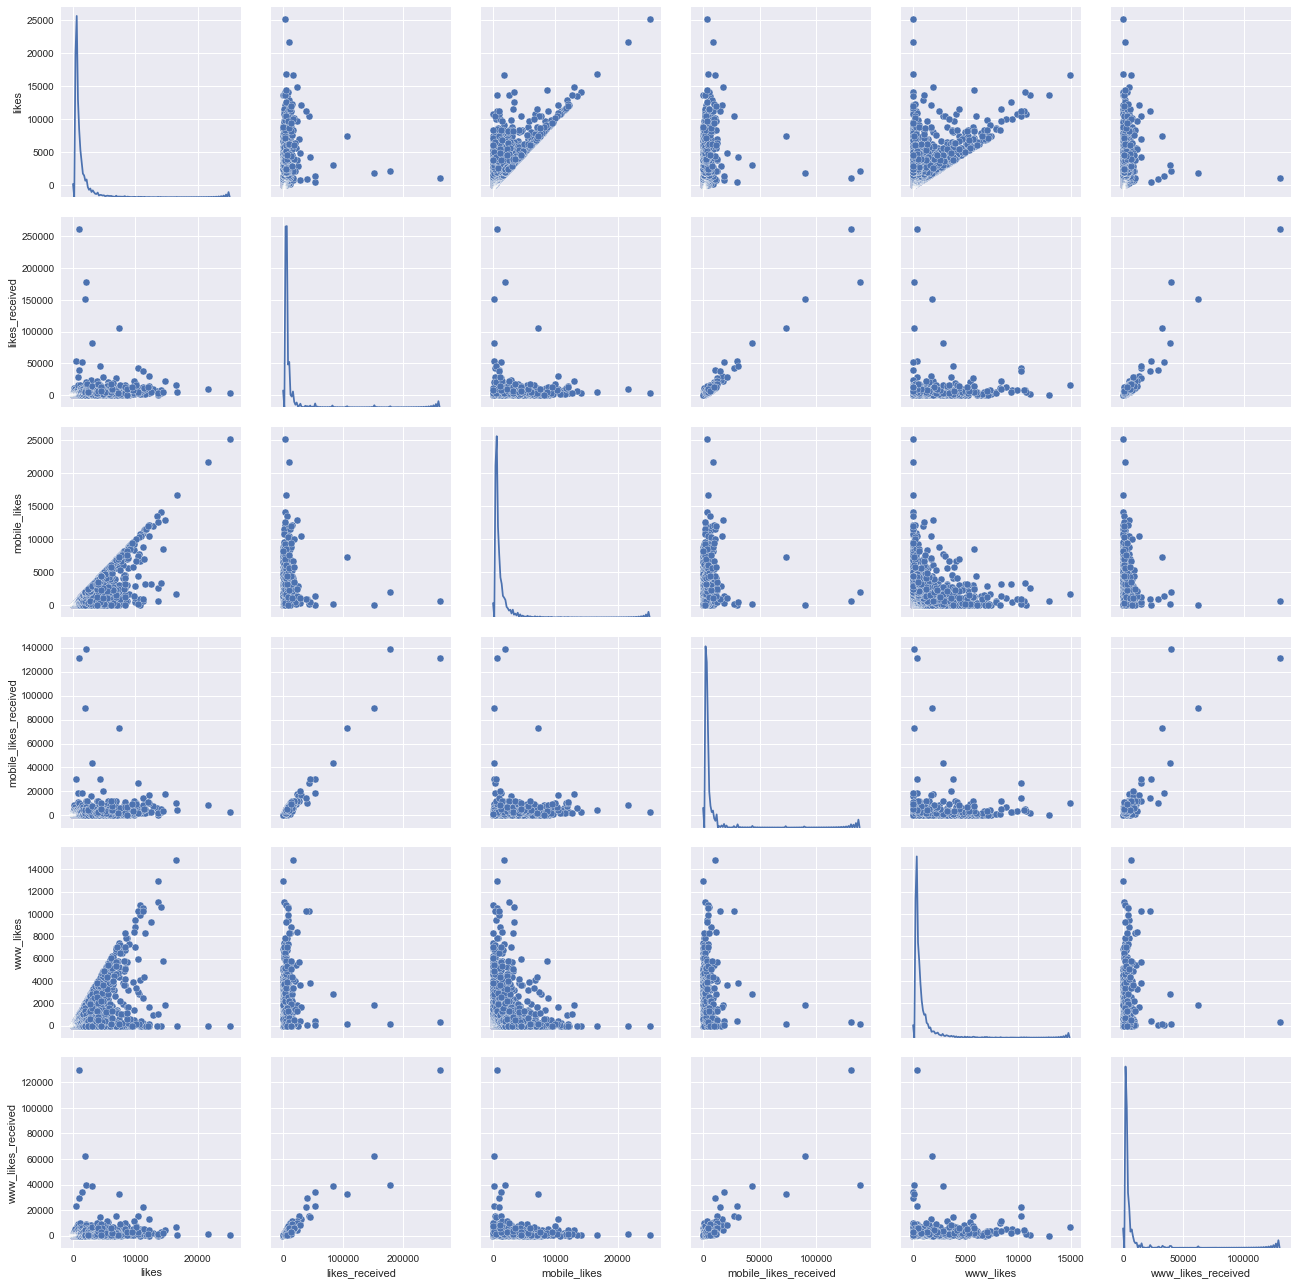

In [40]:
sns.pairplot(FB_data[['likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']], 
             size=3, diag_kind="kde")